In [3]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline
import quandl



In [79]:
# File to Load - import all Confidence Indexs
CCI_data_to_load = "startdata/CCI_Raw_data.csv"
BCI_data_to_load = 'startdata/BCI_Raw_data.csv'
CLI_data_to_load = 'startdata/CLI_Raw_data.csv'
# Read School and Student Data File and store into Pandas DataFrames
CCI_data = pd.read_csv(CCI_data_to_load)
BCI_data = pd.read_csv(BCI_data_to_load)
CLI_data = pd.read_csv(CLI_data_to_load)
CLI_data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,GBR,CLI,AMPLITUD,LTRENDIDX,M,1957-12,97.69984,NaN
1,GBR,CLI,AMPLITUD,LTRENDIDX,M,1958-01,97.73627,NaN
2,GBR,CLI,AMPLITUD,LTRENDIDX,M,1958-02,97.84341,NaN
3,GBR,CLI,AMPLITUD,LTRENDIDX,M,1958-03,97.99134,NaN
4,GBR,CLI,AMPLITUD,LTRENDIDX,M,1958-04,98.15497,NaN


In [82]:
#clean CI (confidence index) data

#remove unnecessary columns
filtered_CCI = CCI_data[['TIME','Value']]
filtered_BCI = BCI_data[['TIME','Value']]
filtered_CLI = CLI_data[['TIME','Value']]

#convert dates to datetime
import datetime
filtered_CCI['TIME']= pd.to_datetime(filtered_CCI['TIME'])
filtered_BCI['TIME']= pd.to_datetime(filtered_BCI['TIME'])
filtered_CLI['TIME']= pd.to_datetime(filtered_CLI['TIME'])

#rename columns
CCI_df= filtered_CCI.rename(columns={"TIME": "date", "Value": "value"})
CLI_df= filtered_CLI.rename(columns={"TIME": "date", "Value": "value"})
BCI_df= filtered_BCI.rename(columns={"TIME": "date", "Value": "value"})

#further filter data for uniform dates in all 3 datasets
CCI_df = CCI_df[CCI_df['date'] > '2007-12-31']
BCI_df = BCI_df[BCI_df['date'] > '2007-12-31']
CLI_df = CLI_df[CLI_df['date'] > '2007-12-31']

,TIME,Value
0,1973-01,101.2458
1,1973-02,101.2283
2,1973-03,101.0854
3,1973-04,100.8459
4,1973-05,100.7044


In [86]:
#for loop function to add filler dates in information to match ticker dates day for day
def date_gen(df):
    
    #create range of days:
    dates = pd.date_range(start ='01/01/2008',end ='11/16/2020')
    
    #create empty dataframe and counter variable
    sample = pd.DataFrame({'date': [], 'value': []})
    counter = 0
    
    #for loop to fill in individual dates
    for date in dates:
        if date.month == df.iloc[counter]['date'].month:
            sample = sample.append({'date': date, 'value': df.iloc[counter]['value']},ignore_index=True)
        else:
            counter +=1
            sample = sample.append({'date': date, 'value': df.iloc[counter]['value']},ignore_index=True)
    return sample

In [94]:
#run each set through the for loop function above
BCI_adj = date_gen(BCI_df)
CLI_adj = date_gen(CLI_df)
CCI_adj = date_gen(CCI_df)

#rename value columns to differentatiate values
CCI_adj= CCI_adj.rename(columns={ "value": "CCI"})
CLI_adj= CLI_adj.rename(columns={ "value": "CLI"})
BCI_adj= BCI_adj.rename(columns={"value": "BCI"})

#sanity check
#BCI_adj.head(3)

#merge datasets
BCI_CCI = BCI_adj.merge(CCI_adj,how='inner',on='date')
OECD_data = CLI_adj.merge(BCI_CCI, how='inner',on='date')
OECD_data.head()

,date,CLI,BCI,CCI
0,2008-01-01,100.5212,101.5117,100.1894
1,2008-01-02,100.5212,101.5117,100.1894
2,2008-01-03,100.5212,101.5117,100.1894
3,2008-01-04,100.5212,101.5117,100.1894
4,2008-01-05,100.5212,101.5117,100.1894


In [4]:
#convert to csv
OECD_data.to_csv('startdata/OECD_data_2008_to_2020.csv')
OECD_data

In [5]:
#code to run tests on all 30 sample tickers

#Code below to combine OECD data with stock data
OECD_data_to_load = 'startdata/OECD_data_2008_to_2020.csv'
# Read School and Student Data File and store into Pandas DataFrames
OECD_data = pd.read_csv(OECD_data_to_load)
    
#define function for train tests
def tester(ticker_name):

    #import API key
    from config import api
    quandl.ApiConfig.api_key = api
    #data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['date','ticker','open','high','low','close','volume'] }, ticker = ['AAPL', 'GOOGL','AMZN'], date = { 'gte': '2010-01-01', 'lte': '2020-11-12' })
    #df = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'GOOGL','AMZN'], date = { 'gte': '2010-01-01', 'lte': '2020-11-12' })
    stock_data = quandl.get_table('WIKI/PRICES', ticker = [ticker_name], date = { 'gte': '2008-01-01', 'lte': '2018-12-30' })
    
    #convert to date
    stock_data['date']= pd.to_datetime(stock_data['date'])
    OECD_data['date']= pd.to_datetime(OECD_data['date'])
    
    #combine stock dataset with OECD information
    combine = stock_data.merge(OECD_data,how='inner',on='date')
    
    #set target input and output
    y = combine["close"].astype(str)
    y.head()
    
    #truncate dataset
    truncate = truncate.drop("date", axis=1)
    X = truncate.drop("close", axis=1)
    
    #introduce tester variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    #standard fit scalers
    X_scaler = StandardScaler().fit(X_train)
    
    #create scaled variables
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    # Import relevants
    from sklearn.svm import SVC 

    #create SVC model with rbf kernel
    model = SVC(kernel='rbf')
    model.fit(X_train_scaled,y_train)
    
    #save variables
    training_data = model.score(X_train_scaled, y_train)
    testing_data = model.score(X_test_scaled, y_test)
    #return
    return testing_data

In [133]:
#define loop function to run all tickers:  Amex was missing info AXRX
def run_tickers():
    ticker_list = ["AMZN","AAPL","CSCO","CMCSA","INTC","MSFT","VZ","V","WMT","GS","JPM","JNJ","PFE","MRK","GIS",'PG','KO','MMM','MCD','BA','CAT','CVX','XOM','GE',"GM","HON","HD"]
    
    #create blank dictionary
    results = {}
    for ticker in ticker_list:
        results[ticker] = tester(ticker)
        print(f'{ticker} is done running')
    return results

In [ ]:
#test run
def run_tickers_test():
    ticker_list = ["AMZN","AAPL","CSCO","CMCSA","INTC","MSFT","VZ","V","WMT","AXP","GS","JPM","JNJ","PFE","MRK","GIS",'PG','KO','MMM','MCD','BA','CAT','CVX','XOM','GE',"GM","RTX","HD"]
    
    #create blank dictionary
    results_test = {}
    for ticker in ticker_list:
        results_test[ticker] = 
        print(f'{ticker} is done running')
    return results_test

In [135]:
final = run_tickers()
final

AMZN is done running
AAPL is done running
CSCO is done running
CMCSA is done running
INTC is done running
MSFT is done running
VZ is done running
V is done running
WMT is done running
GS is done running
JPM is done running
JNJ is done running
PFE is done running
MRK is done running
GIS is done running
PG is done running
KO is done running
MMM is done running
MCD is done running
BA is done running
CAT is done running
CVX is done running
XOM is done running
GE is done running
GM is done running
HON is done running
HD is done running


{'AMZN': 0.0,
 'AAPL': 0.0,
 'CSCO': 0.013975155279503106,
 'CMCSA': 0.0,
 'INTC': 0.0,
 'MSFT': 0.0015527950310559005,
 'VZ': 0.0,
 'V': 0.001584786053882726,
 'WMT': 0.0015527950310559005,
 'GS': 0.0,
 'JPM': 0.0015527950310559005,
 'JNJ': 0.003105590062111801,
 'PFE': 0.0,
 'MRK': 0.0015527950310559005,
 'GIS': 0.0015527950310559005,
 'PG': 0.0,
 'KO': 0.0015527950310559005,
 'MMM': 0.0016025641025641025,
 'MCD': 0.0,
 'BA': 0.0015527950310559005,
 'CAT': 0.0,
 'CVX': 0.0,
 'XOM': 0.0,
 'GE': 0.0015527950310559005,
 'GM': 0.0,
 'HON': 0.0,
 'HD': 0.0}

In [17]:
# Task 3: Begin ML Modeling
#define function for tests on CPI/CLI/BCI
def tester_new(ticker_name):
    
    #import API key
    from config import api
    quandl.ApiConfig.api_key = api
    #data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['date','ticker','open','high','low','close','volume'] }, ticker = ['AAPL', 'GOOGL','AMZN'], date = { 'gte': '2010-01-01', 'lte': '2020-11-12' })
    #df = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'GOOGL','AMZN'], date = { 'gte': '2010-01-01', 'lte': '2020-11-12' })
    stock_data = quandl.get_table('WIKI/PRICES', ticker = [ticker_name], date = { 'gte': '2008-01-01', 'lte': '2018-12-30' })
    
    #convert to date
    stock_data['date']= pd.to_datetime(stock_data['date'])
    OECD_data['date']= pd.to_datetime(OECD_data['date'])
    
    from sklearn.neighbors import KNeighborsClassifier
    
    #combine stock dataset with OECD information
    combine = stock_data.merge(OECD_data,how='inner',on='date')
    
    # Sub-Task 1: Define xy and shape so ML algorithm can use data
    X = combine[["BCI","CCI","CLI"]]
    y = combine["adj_close"].values.reshape(-1, 1)
    
    #import dependents
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    
    #define variables
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    train = combine[:8000]
    test = combine[8000:]
    # Sub-Task 3: Scale data

    from sklearn.preprocessing import StandardScaler
    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)
    
    #create linear regression
    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)
    
    
    # Sub-Task 5: Determine MSE and R2
    #create variables
    predictions = model.predict(X_test_scaled)
    MSE = mean_squared_error(y_test_scaled, predictions)
    r2 = model.score(X_test_scaled, y_test_scaled)
    
    
    # plot data and save as png
    model.fit(X_train_scaled, y_train_scaled)
    plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
    plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
    plt.title(f"Residual Plot of {ticker_name}")
    plt.savefig(f'startdata/{ticker_name}.png')
    
    #store in dataframe
    new_row = {'Ticker Name': [ticker_name], 'MSE': [MSE],'r2':[r2]}
    df = pd.DataFrame(data=new_row)
    return df

In [21]:
#define loop function to run all tickers:  
def run_tickers():
    ticker_list = ["AMZN","AAPL","CSCO","CMCSA","INTC","MSFT","VZ","V","WMT","GS","JPM","JNJ","PFE","MRK","GIS",'PG','KO','MMM','MCD','BA','CAT','CVX','XOM','GE',"F","HON","HD"]
    
    #create blank dataframe
    blank = {'Ticker Name': [], 'MSE': [],'r2':[]}
    output = pd.DataFrame(data=blank)
    
    #for loop to run through the 30 tickers  
    for ticker in ticker_list:
        output = output.append(tester_new(ticker))
        print(f'{ticker} is done running')
    return output

In [22]:
#create final dataframe with ML results
final_df = run_tickers()
final_df.head()

AMZN is done running
AAPL is done running
CSCO is done running
CMCSA is done running
INTC is done running
MSFT is done running
VZ is done running
V is done running
WMT is done running
GS is done running
JPM is done running
JNJ is done running
PFE is done running
MRK is done running
GIS is done running
PG is done running
KO is done running
MMM is done running
MCD is done running
BA is done running
CAT is done running
CVX is done running
XOM is done running
GE is done running
F is done running
HON is done running
HD is done running


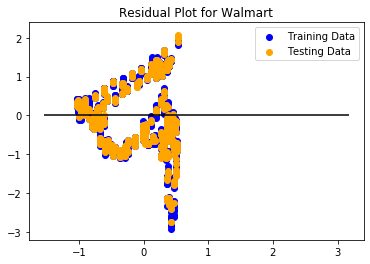

In [31]:
#test plot data
tester_new('AMZN')
plt.show()

In [32]:
#export table results as CSV
final_df.to_csv('f2_MSE_values.csv')

In [13]:
#generate function to generate machine learning for stock volatility 
def volatility_loop(ticker_name):

    # Obtain Raw Data
    # Use Quandl API to obtain data as far back as free access allows
    # Data for stock price data by ticker

    quandl.ApiConfig.api_key = 'MZRHn98qGsdr9wzs79mP'
    df_ticker = quandl.get_table('WIKI/PRICES', ticker = [ticker_name], date = { 'gte': '1980-01-01', 'lte': '2020-11-12' })

    # Task 1: Delete unwanted columns
    df_ticker.drop(df_ticker.columns[[7,8]], axis=1, inplace=True)
    #df_ticker: create features
    # What is it? This is a measure of the range that the stock price bounces around during a day on the market
    # Why can it be important? If the stock bounces around more, can it close at a higher price more often?
    df_ticker['volatility-calc'] = df_ticker.adj_high - df_ticker.adj_low

    # Feature 2: Introduce Rate of Change Volatility

    # What is it? This is a measure of the change in the range that a stock price bounces around during the market day
    # Why can it be important? If the stock bounce keeps changing, can it close at a higher price more often?
    df_ticker['ROC_Volatility']=df_ticker['volatility-calc'].diff()

    # Feature 3: Introduce 10-Day Simple Moving Average

    # What is it? Quick 10-day lookback at stock closing price. 
    # Why can it be important? Typically traders like to ride a short-term trend for gains. Unofficial rule of 
    # stock trading is..."The trend is your friend" 
    df_ticker['10-Day-SMA']=df_ticker.iloc[:,11].rolling(window=10).mean()

    # Feature 4: Introduce 50-Day Simple Moving Average

    # What is it? Slightly longer 50-day lookback at stock closing price.
    # Why can it be important? Trend it with 10-day lookback using the crossover feature
    df_ticker['50-Day-SMA']=df_ticker.iloc[:,11].rolling(window=50).mean()


    # Feature 5: Introduce crossover to check if 10-day SMA > 50-day SMA

    # What is it? Determining when 10-day stock price avg > 50-day stock price avg
    # Why can it be important? If you buy when 10-day-avg > 50-day-avg, how often does the stock "Breakout"?
    # This is when short-term price spikes yield big gains, one of the most common day-trading patterns on Wall St.

    df_ticker['Crossover']=""

    for index, row in df_ticker.iterrows():
        if (row['10-Day-SMA'] > row['50-Day-SMA']):
            df_ticker.loc[index, 'Crossover']=1
        else:
            df_ticker.loc[index, 'Crossover']=0  

    # Feature 6: Volume
    # What is it? Volume is an inbuilt feature with API data pull and a measure of supply/demand of a certain stock.
    # Why can it be important? How does the supply/demand of a stock change its price?

    # Feature 7: Introduce Rate of Change Volume
    # What is it? A measure of how much the #shares of a stock is changing each day
    # Why can it be important?  Change in volume is a measure of change in supply/demand of the stock, potentially 
    # impacting the stock price.

    df_ticker['ROC_Volume']=df_ticker['adj_volume'].diff()

    # Task 3: Fill NaN values with column means and zeros so ML model can run with usable data
    df_ticker['10-Day-SMA'].fillna(value=df_ticker['10-Day-SMA'].median(), inplace=True)
    df_ticker['50-Day-SMA'].fillna(value=df_ticker['50-Day-SMA'].median(), inplace=True)
    df_ticker['ROC_Volume'] = df_ticker['ROC_Volume'].fillna(0)
    df_ticker['ROC_Volatility'] = df_ticker['ROC_Volatility'].fillna(0)

    #task 4: create model for machine learning

    # Sub-Task 1: Define xy and shape so ML algorithm can use data
    X = df_ticker[["volatility-calc","ROC_Volatility"]]
    y = df_ticker["adj_close"].values.reshape(-1, 1)

    # Sub-Task 2: Define x,y training and testing data

    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    train = df_ticker[:8000]
    test = df_ticker[8000:]

    # Sub-Task 3: Scale data

    from sklearn.preprocessing import StandardScaler
    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)

    #Sub-Task 4: fit and test data
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)

    # Sub-Task 5: Determine MSE and R2 and save as dataframe

    from sklearn.metrics import mean_squared_error

    predictions = model.predict(X_test_scaled)
    MSE = mean_squared_error(y_test_scaled, predictions)
    r2 = model.score(X_test_scaled, y_test_scaled)
    
    # plot data and save as png
    model.fit(X_train_scaled, y_train_scaled)
    plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
    plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
    plt.title(f"Residual Plot of {ticker_name}")
    plt.savefig(f'startdata/{ticker_name}.png')
    
    #store in dataframe
    new_df = {'Ticker Name': [ticker_name], 'MSE': [MSE],'r2':[r2]}
    volatility_df = pd.DataFrame(data=new_df)
    return volatility_df


In [17]:
#loop for all tickers
#define loop function to run all tickers:  
def run_tickers_volatility():
    ticker_list = ["AMZN","AAPL","CSCO","CMCSA","INTC","MSFT","VZ","V","WMT","GS","JPM","JNJ","PFE","MRK","GIS",'PG','KO','MMM','MCD','BA','CAT','CVX','XOM','GE',"F","HON","HD"]
    
    #create blank dataframe
    blank = {'Ticker Name': [], 'MSE': [],'r2':[]}
    output = pd.DataFrame(data=blank)
    
    #for loop to run through the 30 tickers  
    for ticker in ticker_list:
        output = output.append(volatility_loop(ticker))
        print(f'{ticker} is done running')
    return output

In [18]:
#run loop
testv1 = run_tickers_volatility()
testv1.head()

AMZN is done running
AAPL is done running
CSCO is done running
CMCSA is done running
INTC is done running
MSFT is done running
VZ is done running
V is done running
WMT is done running
GS is done running
JPM is done running
JNJ is done running
PFE is done running
MRK is done running
GIS is done running
PG is done running
KO is done running
MMM is done running
MCD is done running
BA is done running
CAT is done running
CVX is done running
XOM is done running
GE is done running
F is done running
HON is done running
HD is done running


,Ticker Name,MSE,r2
0,AMZN,0.555383,0.521779
0,AAPL,0.311349,0.689400
0,CSCO,0.520015,0.482857
0,CMCSA,0.617487,0.432037
0,INTC,0.416126,0.578464


In [ ]:
#export table results as CSV
final_df.to_csv('f2_MSE_values.csv')